In [78]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from object_detection.network.edgetpumodel import EdgeTPUModel
from object_detection.network.utils import plot_one_box, Colors, get_image_tensor, xyxy2xywh

In [79]:
img = cv2.imread('/home/pi/new_test/image:0.png')
depth = cv2.imread('/home/pi/new_test/depth:0.png', cv2.IMREAD_GRAYSCALE)

(720, 1280, 3) (720, 1280)


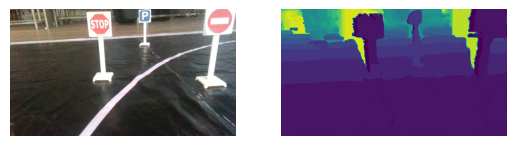

In [60]:
f, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(img)
ax[1].axis('off')
ax[1].imshow(depth)
print(img.shape, depth.shape)

In [6]:
model_path = "object_detection/weights/traffic_3.tflite"
names = "object_detection/data.yaml"
conf_thresh = 0.5
iou_thresh = 0.65
device = 0
        
model = EdgeTPUModel(model_path, names, conf_thresh=conf_thresh, iou_thresh=iou_thresh)        

INFO:EdgeTPUModel:Confidence threshold: 0.5
INFO:EdgeTPUModel:IOU threshold: 0.65
INFO:EdgeTPUModel:Loaded 7 classes
INFO:EdgeTPUModel:Successfully loaded /home/pi/BFMC_BKBuilder_Brain_ROS/src/perception/object_detection/weights/traffic_3.tflite


In [59]:
out = img
full_image, net_image, pad = get_image_tensor(img, 640) #Transform the image into tensors
pred = model.forward(net_image)
det = pred[0]
det[:, :4] = model.get_scaled_coords(det[:,:4], out, pad)

In [61]:
box = []
for *xyxy, conf, cls in reversed(det):
    print(xyxy)
    box.append(xyxy)
    label = f"Class:{model.names[int(cls)]}:{xyxy}"
    print(label)
    out = plot_one_box(xyxy, out, label=label)

[422.0, 8.0, 588.0, 165.0]
Class:Stop sign:[422.0, 8.0, 588.0, 165.0]
[1111.0, 17.0, 1276.0, 139.0]
Class:No-entry road sign:[1111.0, 17.0, 1276.0, 139.0]


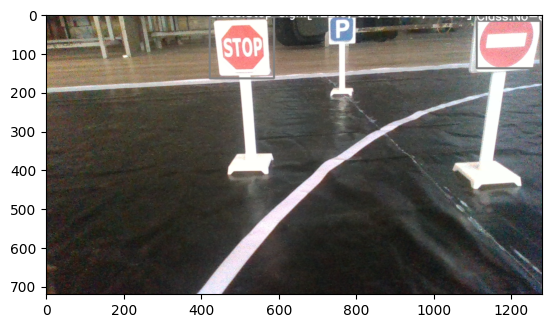

In [62]:
plt.imshow(out)

In [70]:
print(box[0], box[1])

[422.0, 8.0, 588.0, 165.0] [1111.0, 17.0, 1276.0, 139.0]


3.4775151561660653
1.0
0.9999006458022851
1.0


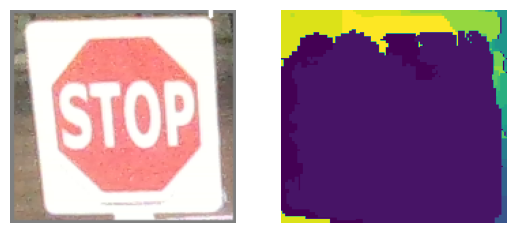

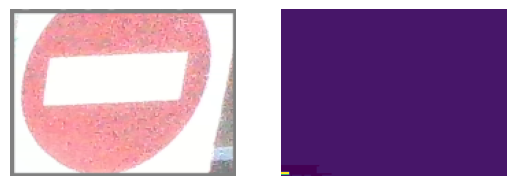

In [68]:
for i in range(len(box)):
    d = depth[int(box[i][1]):int(box[i][3]), int(box[i][0]):int(box[i][2])]
    i = out[int(box[i][1]):int(box[i][3]), int(box[i][0]):int(box[i][2])]
    f, ax = plt.subplots(1,2)
    ax[0].axis('off')
    ax[0].imshow(i)
    ax[1].axis('off')
    ax[1].imshow(d)
    print(d.mean())
    print(np.median(d))

5.360333333333333
3.0


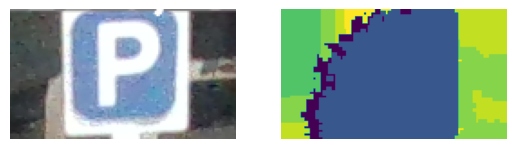

In [93]:
scale_x = 700
scale_x1 = 825
scale_y = 8
scale_y1 = 80
t_d = depth[ scale_y:scale_y1, scale_x:scale_x1]
t_i = out[ scale_y:scale_y1, scale_x:scale_x1 ]
f, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].imshow(t_i)
ax[1].axis('off')
ax[1].imshow(t_d)
print(t_d.mean())
print(np.median(t_d))